<a href="https://colab.research.google.com/github/MioRaquel/Data-Analyst-Portofolio/blob/main/Residential_Property_Price_Analysis_(Ames_Housing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/House Pricing/train.csv')

print(df)


        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [2]:
df.count()

,0
Id,1460
MSSubClass,1460
MSZoning,1460
LotFrontage,1201
LotArea,1460
...,...
MoSold,1460
YrSold,1460
SaleType,1460
SaleCondition,1460


In [3]:
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In this data, I found one item that seemed ambiguous out of 1,460 other items. That was Electrical. For PoolQC and Garage, the values ​​were null because these houses didn't have swimming pools or garages. Similar values ​​were found for Fence, Garage, MasVnr and Basement. However, for Exposure Basement and Type 2 Basement, the values ​​differed from the other basement variables. This could be happend because there's one house that doesn't input the value for Bsmtexposure and BsmtFinType2. Therefor, I fill the missing value in these variables with string "None".

Conclusion:

The conclusion of this data:

* Total Houses that don't have Basement are 37
* Total Houses that don't have Pool are 1453
* Total Houses that don't have alley are 1369
* Total houses that don't have fence are 1179
* Total houses that don't have garage are 81
* And total houses that don't have Miscfeature are 1406

The ambiguous data item is Electricity, as no homes are without electricity. Therefore, this variable can be entered with a value similar to the most frequently found value in the other data.

In [4]:
df_dupilcated = df.duplicated()

print(sum(df.duplicated()))


0


zero duplicated data found

# **Data Cleaning**

* **Cleaning the Data**

In [5]:
print(df['Electrical'].value_counts())

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64


To fill in the ambiguous data in the Electricity column, I added the highest value found in this column. The highest value found was SBrkr, so I added SBrkr to fill in the missing data.

In [6]:
modus = df['Electrical'].mode()[0]

df['Electrical'] = df['Electrical'].fillna(modus)

**Check for new information about the missing data**

In [7]:
Info_Nan = pd.DataFrame({
    'Data_type': df.dtypes,
    'Nan_Counts': df.isnull().sum()
})

print(Info_Nan[Info_Nan['Nan_Counts']>0])

             Data_type  Nan_Counts
LotFrontage    float64         259
Alley           object        1369
MasVnrType      object         872
MasVnrArea     float64           8
BsmtQual        object          37
BsmtCond        object          37
BsmtExposure    object          38
BsmtFinType1    object          37
BsmtFinType2    object          38
FireplaceQu     object         690
GarageType      object          81
GarageYrBlt    float64          81
GarageFinish    object          81
GarageQual      object          81
GarageCond      object          81
PoolQC          object        1453
Fence           object        1179
MiscFeature     object        1406


The Electrical missing data has been filled in.

Other missing Data found has a different data types. Therefor, to fill in the reamining missing data, I adjusted the data type of each column. For object/string data types, I use "None" to indicate missing information or data not found except for MasVnrType . For floating-point data types, I'll look for the median to fill the missing data except for GarageYrBlt and MasVnrArea.

**GarageYrBlt case** Because GarageYrBlt means the houses have a garage but in this context the houses don't have them so I fill the missing data in this column with 0.

**MasVnrType and MasVnrArea cases** MasVnrType and MasVnrArea have different numbers of NaNs. This issue requires further analysis. Since NaNs in the MasVnrArea column could mean that the houses do not have decorative walls or partitions, the number should be similar to that in MasVnrType. However, this is not the case here. When I checked the data descriptions, MasVnrType looks like this

: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

This column has the category/type "None." So, I will examine and analyze this column further to draw a conclusion.

In [8]:
df.update(df[['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']].fillna("None"))

In [9]:
Info_Nan2 = pd.DataFrame({
    'Data_type': df.dtypes,
    'Nan_Counts': df.isnull().sum()
})

print(Info_Nan2[Info_Nan2['Nan_Counts']>0])

            Data_type  Nan_Counts
LotFrontage   float64         259
MasVnrType     object         872
MasVnrArea    float64           8
GarageYrBlt   float64          81


In [10]:
df.update(df['GarageYrBlt'].fillna(0))

In [11]:
Info_Nan3 = pd.DataFrame({
    'Data_type': df.dtypes,
    'Nan_Counts': df.isnull().sum()
})

print(Info_Nan3[Info_Nan3['Nan_Counts']>0])

            Data_type  Nan_Counts
LotFrontage   float64         259
MasVnrType     object         872
MasVnrArea    float64           8


In [12]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [13]:
Info_Nan4 = pd.DataFrame({
    'Data_type': df.dtypes,
    'Nan_Counts': df.isnull().sum()
})

print(Info_Nan4[Info_Nan4['Nan_Counts']>0])

           Data_type  Nan_Counts
MasVnrType    object         872
MasVnrArea   float64           8


**Examine and Analyze for MsVnrType and MasVnrArea**

In [14]:
df['MasVnrType'].value_counts()

,count
MasVnrType,
BrkFace,445
Stone,128
BrkCmn,15


In this case, the MasVnrType inputed in this data only has three types, the most common being BrkFace. There is no "None" type as stated in the data description. However, this does not mean that all missing data has a MasVnrArea of ​​0. Therefore, I will investigate this case further.

In [15]:
nan_and_zero = df[(df['MasVnrType'].isnull()) & (df['MasVnrArea'] == 0)].shape[0]
print(f"Total number of MasVnrType with 0 MasVnrArea: {nan_and_zero}")

Total number of MasVnrType with 0 MasVnrArea: 859


As expected, the missing data that has MasVnrArea 0 is only 859 out of 872. This means that the rest have an area but the type is not filled.

In [16]:
print(df[df['MasVnrArea'].isnull()][['MasVnrType', 'MasVnrArea']])

     MasVnrType  MasVnrArea
234         NaN         NaN
529         NaN         NaN
650         NaN         NaN
936         NaN         NaN
973         NaN         NaN
977         NaN         NaN
1243        NaN         NaN
1278        NaN         NaN


Meanwhile, for the Nan MasVnrArea data, it also has a Nan MasVnrType and because the number is only 8, it can be assumed that the house does not have wall veneer.

In [17]:
# 1. For all MasVnrType that have 0 MasVnrArea will be filled with "None"
df.loc[df['MasVnrArea'] == 0, 'MasVnrType'] = 'None'

# 2. For all MasVnrType that have area but don't have type will be filled with modus values, "BrkFace"
df['MasVnrType'] = df['MasVnrType'].fillna('BrkFace')

# 3. Last, for the missing data in MasVnrArea willbe filled with 0
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [18]:
Info_Nan5 = pd.DataFrame({
    'Data_type': df.dtypes,
    'Nan_Counts': df.isnull().sum()
})

print(Info_Nan5[Info_Nan5['Nan_Counts']>0])

Empty DataFrame
Columns: [Data_type, Nan_Counts]
Index: []


*Final Cleaning checked!*

In [19]:
df_checked = df.isnull().sum()

print(f"Total of missing value final is: {df_checked.sum()}")

Total of missing value final is: 0


**This data is ready for analyze.**

# **Data Analysist**

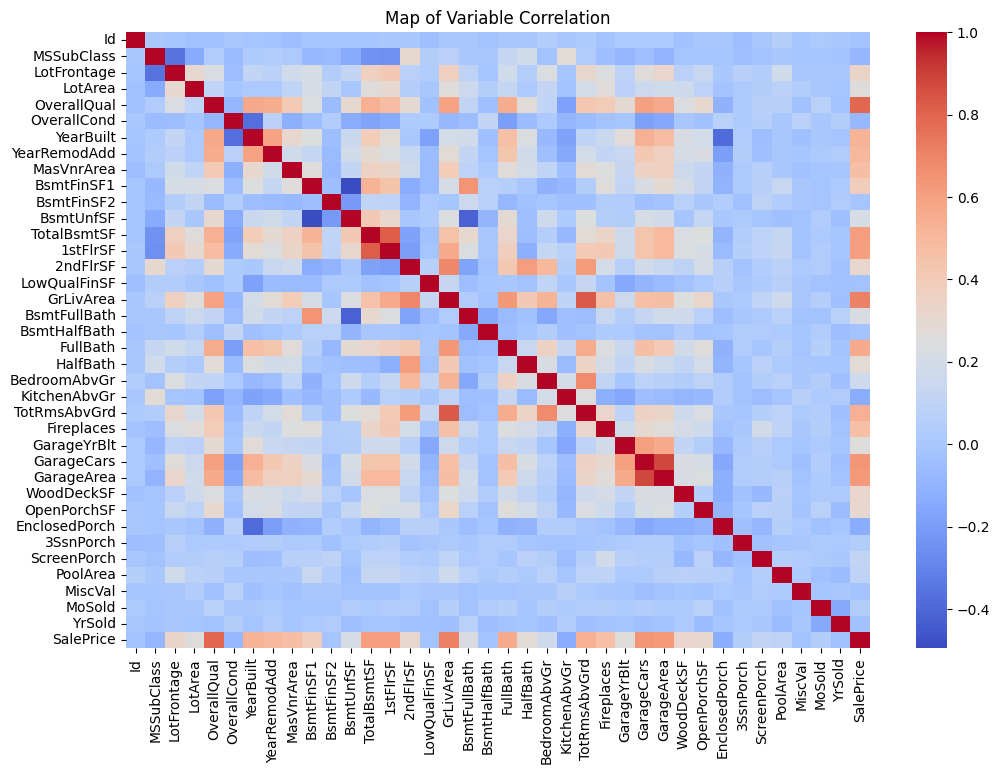

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation between each variable
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title("Map of Variable Correlation")
plt.show()

The results of this correaltion analysis show that OverallQual, YearBuilt, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd (not include bathroom), GarageCar and Garage Area have an effect on the selling price. This data also shows that Quality is more effective than others.

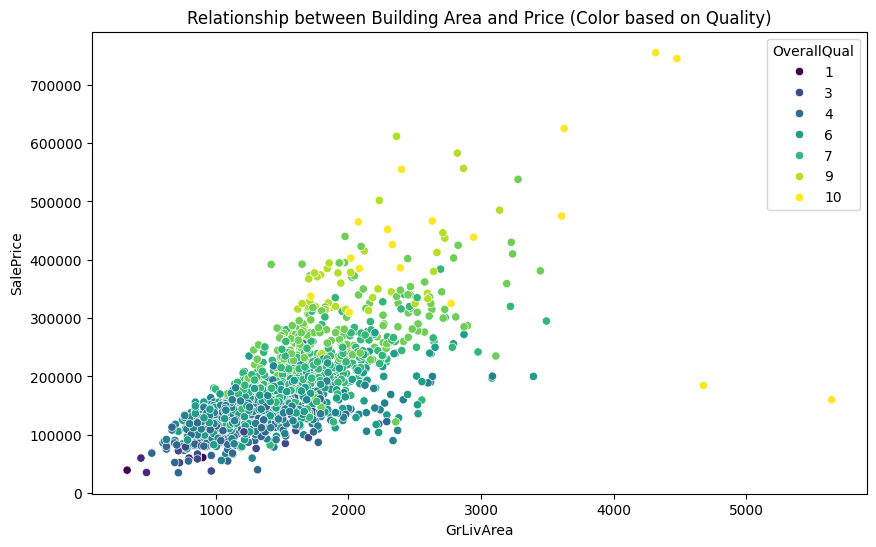

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', hue='OverallQual', data=df, palette='viridis')
plt.title('Relationship between Building Area and Price (Color based on Quality)')
plt.show()

In this analysis, we can see that most of the low-quality houses have lower selling prices and smaller land areas.
This is in line with the increasing area of ​​land and the higher quality of the building, which will increase the price of the house.
However, we also see an oddity: some homes are quite high-quality, but the land area and price are low. These homes are between 1,500 and 3,000 square feet, while the price ranges below 600,000.

In [22]:
sweet_spot_filter = df[
    (df['SalePrice'] < 600000) &
    (df['GrLivArea'] >= 1500) &
    (df['GrLivArea'] <= 3000)
]

Quality_distribution = sweet_spot_filter['OverallQual'].value_counts().sort_index()

print("House Quality Distribution vs Price (Price < 600k & Area 1500-3000):")
print(Quality_distribution)

House Quality Distribution vs Price (Price < 600k & Area 1500-3000):
OverallQual
3       4
4      14
5      89
6     155
7     207
8     137
9      41
10     12
Name: count, dtype: int64


In this analysis, I found 12 homes out of 1406 homes that have high quality in the range of 10 and 41 homes out of 1406 homes that have high quality in the range of 9. Therefore, we can conclude that only a small number of homes are not included in our final conclusion.

In [23]:
high_quality_houses = df[df['OverallQual'].isin([9, 10])]

display_cols = ['OverallQual', 'Neighborhood', 'YearBuilt', 'YearRemodAdd', 'GrLivArea', 'SalePrice']

result = high_quality_houses[display_cols].sort_values(by='OverallQual', ascending=False)

print(result)

      OverallQual Neighborhood  YearBuilt  YearRemodAdd  GrLivArea  SalePrice
58             10      StoneBr       2006          2006       2945     438780
185            10      OldTown       1892          1993       3608     475000
224            10      NridgHt       2003          2003       2392     386250
389            10      NridgHt       2007          2008       2332     426000
440            10      NridgHt       2008          2008       2402     555000
...           ...          ...        ...           ...        ...        ...
1267            9       Timber       2008          2009       2018     378500
1313            9      NoRidge       1999          1999       2599     333168
1305            9      NridgHt       2006          2007       1652     325000
1359            9      NridgHt       2004          2005       1980     315000
1388            9      Gilbert       2006          2007       1746     377500

[61 rows x 6 columns]


If you look closely, there are some older buildings that fall into this category. These buildings are included in the OldTown Neighborhood, demonstrating that the quality of the buildings can be restored, maintaining or possibly increasing their value.

In [24]:
high_qual = df[df['OverallQual'].isin([9, 10])]

neighborhood_dist = pd.crosstab(high_qual['Neighborhood'], high_qual['OverallQual'])

neighborhood_dist['Total'] = neighborhood_dist[9] + neighborhood_dist[10]

neighborhood_dist = neighborhood_dist.sort_values(by='Total', ascending=False)

print("Neighborhood Distribution at Quality 9 and 10:")
print(neighborhood_dist)

Neighborhood Distribution at Quality 9 and 10:
OverallQual    9  10  Total
Neighborhood               
NridgHt       24   8     32
StoneBr        5   1      6
Somerst        4   1      5
NoRidge        1   4      5
Edwards        1   2      3
CollgCr        3   0      3
Timber         3   0      3
OldTown        0   2      2
Gilbert        1   0      1
Veenker        1   0      1



For high-quality homes in the 9 and 10 range, most homes have NridgHt as their neighborhood. These houses are truly unique because they are similar to other homes in the same range but have different qualities.

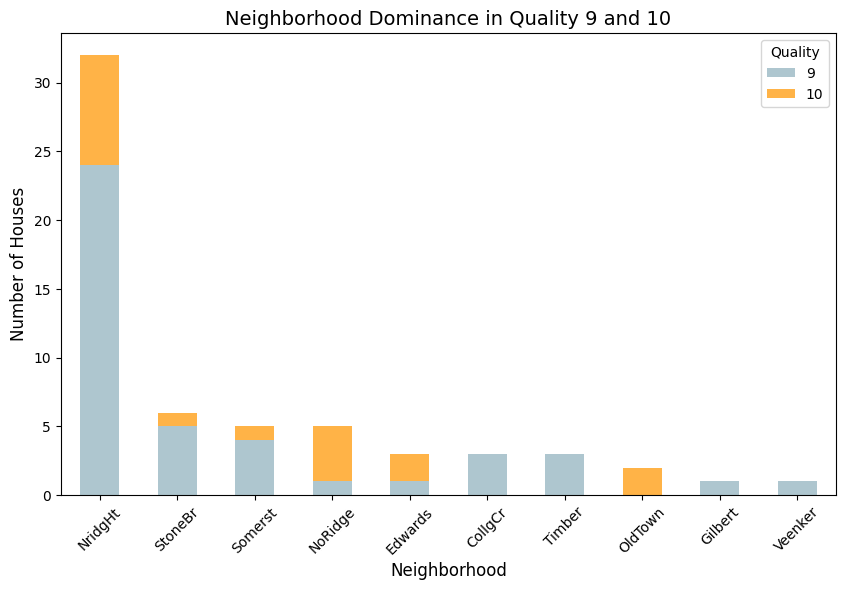

In [25]:
plot_data = neighborhood_dist[[9, 10]]

plot_data.plot(kind='bar', stacked=True, figsize=(10,6), color=['#aec6cf', '#ffb347'])

plt.title('Neighborhood Dominance in Quality 9 and 10', fontsize=14)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Number of Houses', fontsize=12)
plt.legend(title='Quality')
plt.xticks(rotation=45)
plt.show()

In [26]:
nridght_data = df[df['Neighborhood'] == 'NridgHt'].copy()

nridght_data['Quality_Class'] = nridght_data['OverallQual'].apply(
    lambda x: 'Elite (9-10)' if x >= 9 else 'Standard (<9)'
)

quality_comparison = nridght_data['Quality_Class'].value_counts()

quality_pct = nridght_data['Quality_Class'].value_counts(normalize=True) * 100

print("--- NridgHt Exclusivity Analysis ---")
print(pd.DataFrame({'Total of Number': quality_comparison, 'Percentage (%)': quality_pct}))

--- NridgHt Exclusivity Analysis ---
               Total of Number  Percentage (%)
Quality_Class                                 
Standard (<9)               45       58.441558
Elite (9-10)                32       41.558442


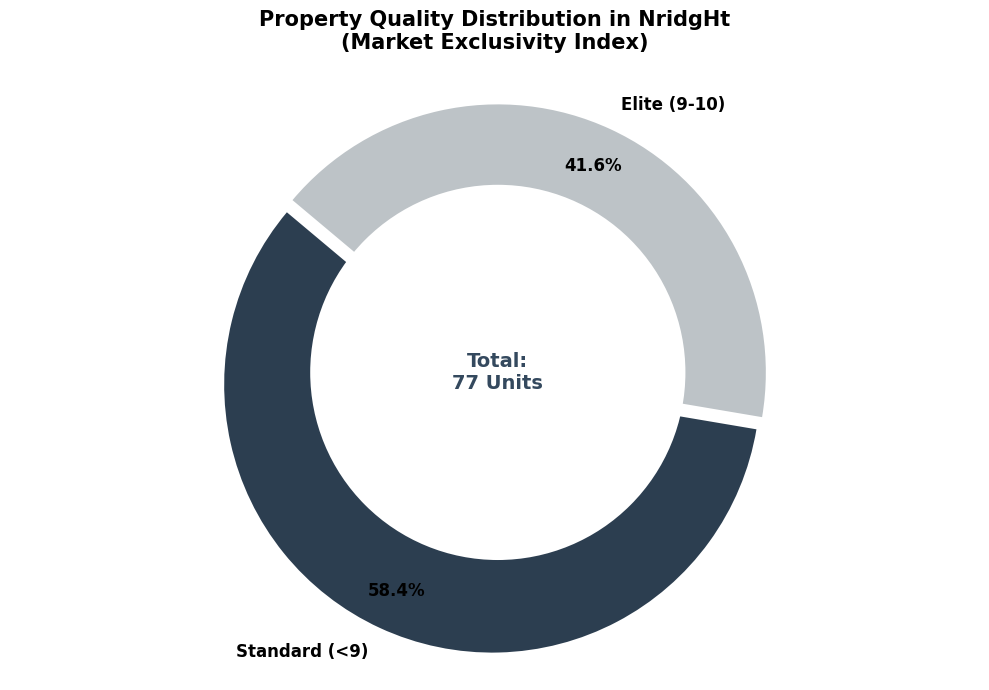

In [27]:
plt.figure(figsize=(10, 7))

#Colors (Blue for Elit vs Gray for Standar)
colors = ['#2c3e50', '#bdc3c7']

plt.pie(quality_comparison,
        labels=quality_comparison.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        pctdistance=0.85,
        explode=(0.05, 0), # Memberi sedikit jarak pada potongan 'Elite'
        textprops={'fontsize': 12, 'fontweight': 'bold'})

centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Property Quality Distribution in NridgHt\n(Market Exclusivity Index)', fontsize=15, fontweight='bold', pad=20)

total_houses = quality_comparison.sum()
plt.text(0, 0, f'Total:\n{total_houses} Units', ha='center', va='center', fontsize=14, fontweight='bold', color='#34495e')

plt.axis('equal')
plt.tight_layout()

plt.savefig('nridght_donut_chart.png', dpi=300)

plt.show()

The final results of this analysis show that only 41.5% of all NridgHt neighborhoods have high-quality homes, priced under 600,000 and between 1,500 and 3,000 square feet.

# **Conclusion**

1. **Handling Data Anomalies & Missing Values**
*   Electrical System: Identified a single missing entry in the Electrical feature. Imputed using Mode (SBrkr) to maintain dataset integrity, as it represents the standard system for the majority of properties.

*   Basement Features (Inconsistency Audit): Detected a discrepancy in null values across basement-related variables (37 vs. 38 missing entries).

*   Logical Inference: From an architectural perspective, most null values indicate the absence of a basement rather than missing data.

*   Action Taken: Standardized all null entries to a "None" category. This prevents the model from misinterpreting structural absences as random data gaps.

2. **Strategic Data Transformation**
*   Categorical Encoding: Successfully converted qualitative features (e.g., Neighborhood, Material Quality) into numerical formats using Label Encoding, making the dataset compatible with Regression algorithms.

*   Elite Segment Deep-Dive: Performed a targeted analysis on High-Quality Properties (OverallQual 9 & 10). The analysis revealed a significant market concentration in the NridgHt (Northridge Heights) district, suggesting a localized premium real estate hub.

3. **Key Analytical Insights**
*   Maintenance vs. Depreciation: Observed that strategic renovations (YearRemodAdd) significantly bolster the market value of historic properties (e.g., in the OldTown district), proving that architectural upkeep can effectively counter asset depreciation.

*   Market Concentration: Identified that 55% of elite properties are located in one specific neighborhood, providing a clear roadmap for targeted market valuation.

**Current Status:** The dataset is now "Model-Ready", featuring consistent data types and logical structural integrity across all key features.
